In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.Age.fillna(df.Age.median(),inplace=True) # inplace=True 直接在原数据上删改
df.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [4]:
df["Sex"]=df["Sex"].replace({"male":str(1),"female":str(0)}).astype(int)
df["Embarked"].fillna("S",inplace=True)
df["Embarked"]=df["Embarked"].replace({"S":str(0),"Q":str(1),"C":str(2)}).astype(int)

In [5]:
y_label=np.array(df["Survived"].values)
Pclass=np.array(df["Pclass"].values)
gender = np.array(df["Sex"].values)
age = np.array(df["Age"].values) 
SibSp=np.array(df["SibSp"].values)
Parch=np.array(df["Parch"].values)
Fare =np.array(df["Fare"].values)
Fare = list(map(int,Fare))
embarked = np.array(df["Embarked"].values)
X_train=np.vstack((Pclass,gender,age,SibSp,Parch,Fare,embarked)).T
X_train.shape

(891, 7)

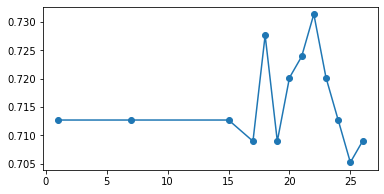

In [6]:
from classifiers import KNN
from sklearn.model_selection import train_test_split
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
accurancy_mean=[]
k_zip= [1,7,15,17,18,19,20,21,22,23,24,25,26]
Xtrain,Xtest,ytrain,ytest=train_test_split(X_train,y_label,test_size=0.3,shuffle=True)
for k in k_zip:
    for i in range(100):
        accurancy_list=[]
        classifier_L2 = KNN()
        classifier_L2.train(Xtrain,ytrain)
        y_pred=classifier_L2.predict(Xtest,k=k,L=2)
        num_test=Xtest.shape[0]
        accurancy=np.sum(ytest==y_pred)/num_test
        accurancy_list.append(accurancy)
    accurancy_mean.append(accurancy_list)
ax.plot(k_zip,accurancy_mean,'-o')


In [7]:
df = pd.read_csv("test.csv")
df.Age.fillna(df.Age.mean(),inplace=True)
Pclass=np.array(df["Pclass"].values)
gender = np.array(df["Sex"].values)
age = np.array(df["Age"].values) 
SibSp=np.array(df["SibSp"].values)
Parch=np.array(df["Parch"].values)
Fare =np.array(df["Fare"].values)
Fare = list(map(int,Fare))
embarked = np.array(df["Embarked"].values)
X_train=np.vstack((Pclass,gender,age,SibSp,Parch,Fare,embarked)).T
X_train.shape

(418, 7)